In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crx.data')
df.head()


,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


## Data Preprocessing 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0       689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  01      689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  00202   689 non-null    object 
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [4]:
df.describe()

,0,1.25,01,0.1
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


## missing data

In [5]:
# checking for missing values
df.isna().sum()

b        0
30.83    0
0        0
u        0
g        0
w        0
v        0
1.25     0
t        0
t.1      0
01       0
f        0
g.1      0
00202    0
0.1      0
+        0
dtype: int64

##### while looking trought the dataset, found "?" instead of NaN

In [6]:

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    value_counts = df[column].value_counts()
    question_mark_count = value_counts.get('?', 0)
    print(column, ':', question_mark_count)
    
# drop missing data
for column in categorical_columns:
    has_question_mark = df[column].isin(['?']).any()
    if has_question_mark > 0:
        df[column] = df[column].replace('?', np.nan)
        #df[column] = df[column].fillna(method='ffill')
        df[column].dropna()


b : 12
30.83 : 12
u : 6
g : 6
w : 9
v : 9
t : 0
t.1 : 0
f : 0
g.1 : 0
00202 : 13
+ : 0


## outliers

##### note: i think column 0.1 has significant outliers, as the distribution is highly concentrated around zero, but the sharp drop suggests the presence of outliers.
##### note 2: both the boxplot and the difference between the mean and the median corroborate this.

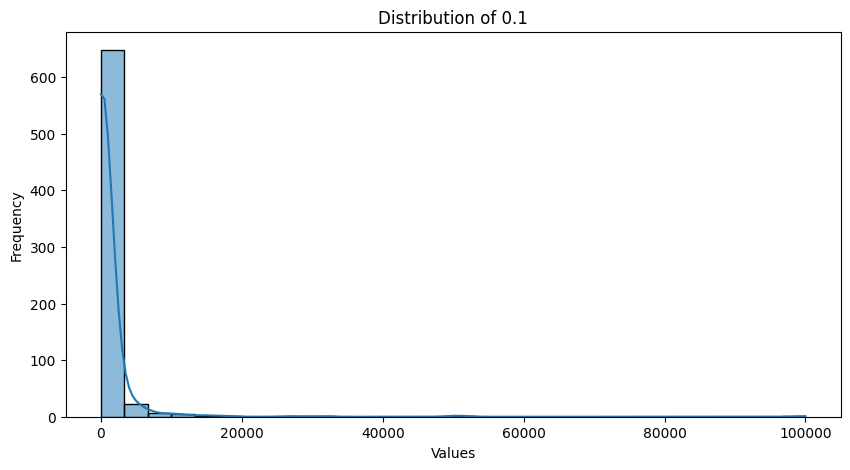

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['0.1'], kde= True, bins=30)
plt.title('Distribution of 0.1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Values')

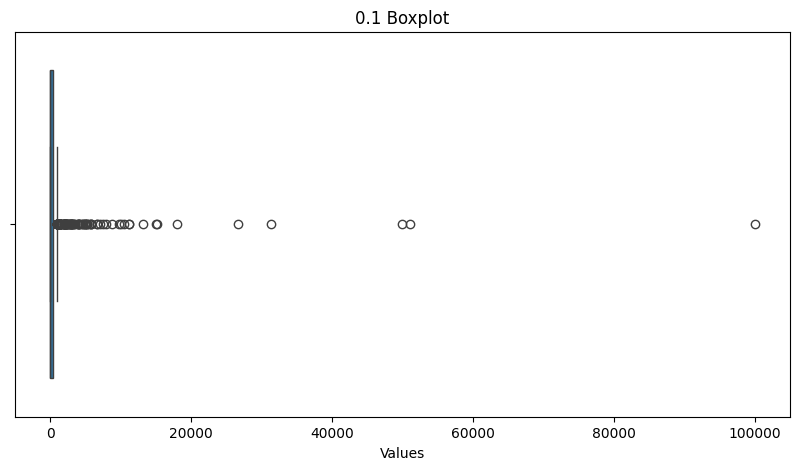

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['0.1'])
plt.title('0.1 Boxplot')
plt.xlabel('Values')

In [9]:
print(df['0.1'].mean())
print(df['0.1'].median())

1018.8621190130624
5.0


In [10]:
df['0.1'].skew()

np.float64(13.131421358555228)

### removing outliers using IQR

In [11]:
Q1 = df['0.1'].quantile(0.25)
Q3 = df['0.1'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_filtered_IQR = df[~((df['0.1'] < lower_limit) | (df['0.1'] > upper_limit))]

df_filtered_IQR.shape

(577, 16)

Text(0.5, 0, 'Values')

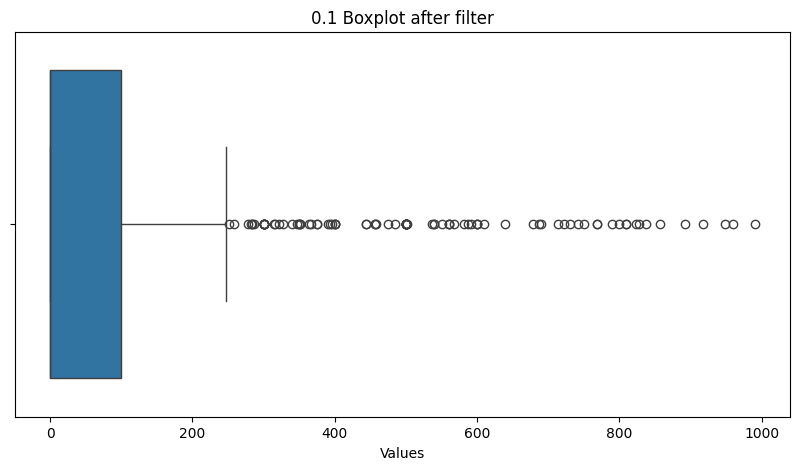

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_filtered_IQR['0.1'])
plt.title('0.1 Boxplot after filter')
plt.xlabel('Values')

### treating outliers with log transformation

In [13]:
df['0.1_log'] = np.log1p(df['0.1'])

Text(0.5, 0, 'Values')

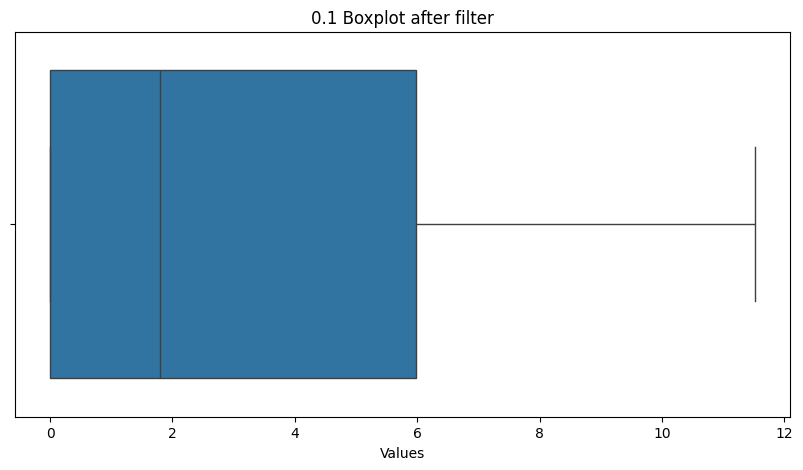

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x= df['0.1_log'])
plt.title('0.1 Boxplot after filter')
plt.xlabel('Values')

#### log transformation worked better

In [15]:
df.describe()

,0,1.25,01,0.1,0.1_log
count,689.000000,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119,2.976635
std,4.978470,3.348739,4.866180,5213.743149,3.188731
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000,1.791759
75%,7.250000,2.625000,3.000000,396.000000,5.983936
max,28.000000,28.500000,67.000000,100000.000000,11.512935
